In [2]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install scikit-image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob, os
import seaborn as sns
import skimage

In [3]:
from subprocess import check_output
folderMain = "EDA"
folderImg = "lote 3 - camara"
print(check_output(["ls", f"../{folderMain}"]).decode("utf8"))
smjpegs = [f for f in glob.glob(f"../{folderMain}/{folderImg}/*.jpg")]
smjpegs = smjpegs[:10]
print(smjpegs) #podemos comentar la linea

exploratory-image-analysis.ipynb
lote 3 - camara
Untitled.ipynb

['../EDA/lote 3 - camara/504.jpg', '../EDA/lote 3 - camara/540 (1).jpg', '../EDA/lote 3 - camara/600 (7).jpg', '../EDA/lote 3 - camara/900 (6).jpg', '../EDA/lote 3 - camara/1875 (1).jpg', '../EDA/lote 3 - camara/960 (4).jpg', '../EDA/lote 3 - camara/1140 (1).jpg', '../EDA/lote 3 - camara/2220 (1).jpg', '../EDA/lote 3 - camara/3475.jpg', '../EDA/lote 3 - camara/5300.jpg']


In [4]:
from subprocess import check_output
folderMain = "EDA"
folderImg = "lote 3 - camara"
print(check_output(["ls", f"../{folderMain}"]).decode("utf8"))
smjpegs = [f for f in glob.glob(f"../{folderMain}/{folderImg}/*.jpg")]
smjpegs = smjpegs[:10]

exploratory-image-analysis.ipynb
lote 3 - camara
Untitled.ipynb



In [5]:
set_images = [smj for smj in smjpegs if ".jpg" in smj]
print(set_images)

['../EDA/lote 3 - camara/504.jpg', '../EDA/lote 3 - camara/540 (1).jpg', '../EDA/lote 3 - camara/600 (7).jpg', '../EDA/lote 3 - camara/900 (6).jpg', '../EDA/lote 3 - camara/1875 (1).jpg', '../EDA/lote 3 - camara/960 (4).jpg', '../EDA/lote 3 - camara/1140 (1).jpg', '../EDA/lote 3 - camara/2220 (1).jpg', '../EDA/lote 3 - camara/3475.jpg', '../EDA/lote 3 - camara/5300.jpg']


# Basic exploration

RPG dim:  (360, 640, 3)
Byte scaled (0-255:  0 255
Matrix of pixels by color channels:  (230400, 3) 

Look for clusters and separatbility in the data: 


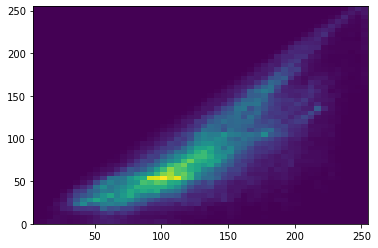

In [6]:
#AQUI ESCOGEMOS LA PRIMERA IMAGEN
first = plt.imread(set_images[2])
dims = np.shape(first)

print('RPG dim: ',dims)
print('Byte scaled (0-255: ',np.min(first), np.max(first))
pixel_matrix = np.reshape(first, (dims[0] * dims[1], dims[2]))
print('Matrix of pixels by color channels: ', np.shape(pixel_matrix),'\n')
#plt.scatter(pixel_matrix[:,0], pixel_matrix[:,1])
print('Look for clusters and separatbility in the data: ')
plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))
plt.show()


In [7]:
%%capture
for image in set_images:
    first = plt.imread(image)
    plt.imshow(first)
    plt.show()

 # Data Exploration

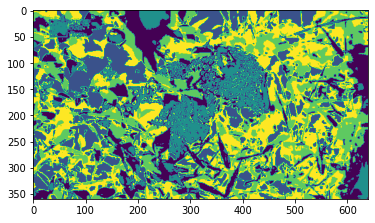

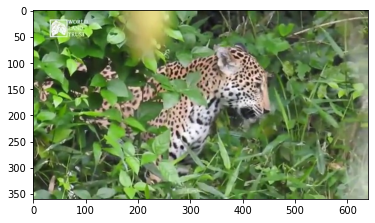

In [8]:
# simple k means clustering
from sklearn import cluster
image = plt.imread(set_images[2])
kmeans = cluster.KMeans(5)
clustered = kmeans.fit_predict(pixel_matrix)

dims = np.shape(first)
clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.show()
plt.imshow(image)
plt.show()

In [9]:
ind0, ind1, ind2, ind3 = [np.where(clustered == x)[0] for x in [0, 1, 2, 3]]

Text(0.5, 0, 'Red channel')

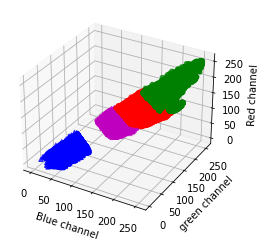

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
             ('b', '^', ind1),
             ('g', '8', ind2),
             ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix[ind, 0]
    ys = pixel_matrix[ind, 1]
    zs = pixel_matrix[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')


/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

<AxesSubplot:ylabel='Density'>

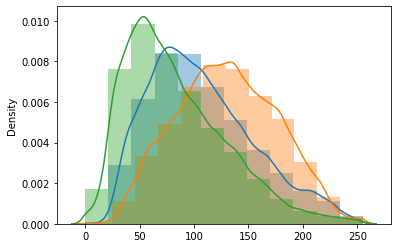

In [11]:
sns.distplot(pixel_matrix[:,0], bins=12)
sns.distplot(pixel_matrix[:,1], bins=12)
sns.distplot(pixel_matrix[:,2], bins=12)

In [12]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [13]:
msi_img = MSImage(image)
print(np.shape(msi_img.matrix))
print(np.shape(msi_img.img))

(230400, 3)
(360, 640, 3)



# Brightness Normalization

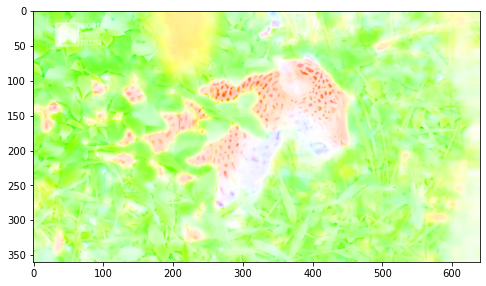

In [14]:
def bnormalize(mat):
    """much faster brightness normalization, since it's all vectorized"""
    bnorm = np.zeros_like(mat, dtype=np.float32)
    maxes = np.max(mat, axis=1)
    bnorm = mat / np.vstack((maxes, maxes, maxes)).T
    return bnorm


bnorm = bnormalize(msi_img.matrix)
bnorm_img = msi_img.to_matched_img(bnorm)
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img)
plt.show()

/tmp/ipykernel_23349/3412316091.py:5: RuntimeWarning: invalid value encountered in divide
  bnorm = mat / np.vstack((maxes, maxes, maxes)).T


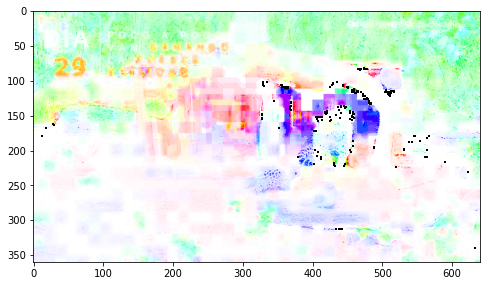

In [15]:
#ESCOGEMOS SEGUNDA IMAGEN para comparar
image_2 = plt.imread(set_images[-1])
msi_img2 = MSImage(image_2)
bnorm_2 = bnormalize(msi_img2.matrix)
bnorm_2_img = msi_img2.to_matched_img(bnorm_2)
plt.figure(figsize=(8,10))
plt.imshow(bnorm_2_img)
plt.show()

/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

<AxesSubplot:ylabel='Density'>

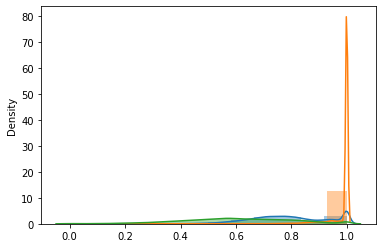

In [16]:
#PRIMER PLOT DE CALOR IMAGE 1
msinorm79_1 = MSImage(bnorm_img)

sns.distplot(msinorm79_1.matrix[:,0], bins=12)
sns.distplot(msinorm79_1.matrix[:,1], bins=12)
sns.distplot(msinorm79_1.matrix[:,2], bins=12)

/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/karatsi/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

<AxesSubplot:ylabel='Density'>

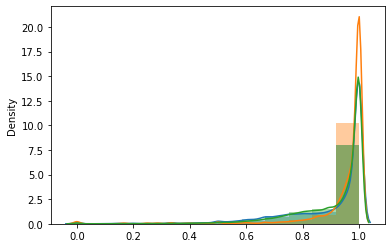

In [17]:
#PRIMER PLOT CALOR IMAGE 2
msinorm79_2 = MSImage(bnorm_2_img)

sns.distplot(msinorm79_2.matrix[:,0], bins=12)
sns.distplot(msinorm79_2.matrix[:,1], bins=12)
sns.distplot(msinorm79_2.matrix[:,2], bins=12)

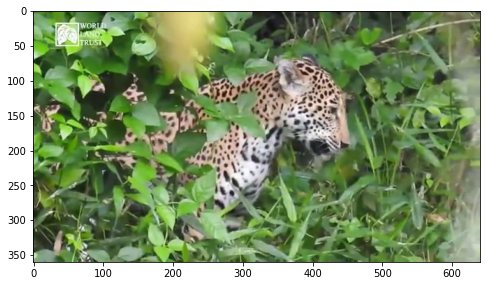

255

In [18]:
plt.figure(figsize=(8,10))
plt.imshow(image)
plt.show()
np.max(image[:,:,0])

# Using thresholds with brightness normalization

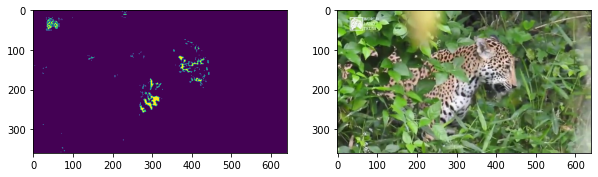

In [19]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(image[:,:,0] > 230)
plt.subplot(122)
plt.imshow(image)
plt.show()

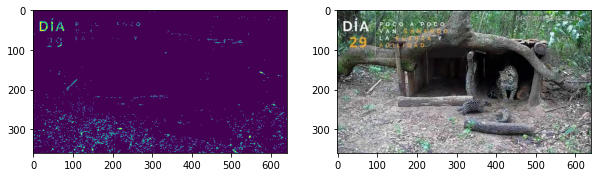

In [20]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(image_2[:,:,0] > 230)
plt.subplot(122)
plt.imshow(image_2)
plt.show()

## COMBINANDO

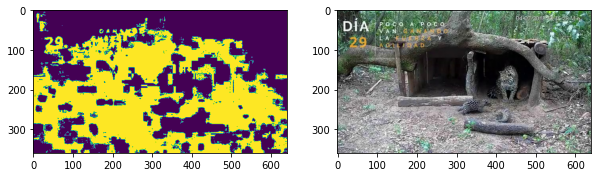

In [21]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(bnorm_2_img[:,:,0] > 0.98)
plt.subplot(122)
plt.imshow(image_2)
plt.show()

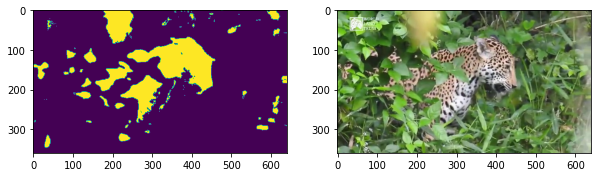

In [22]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(bnorm_img[:,:,0] > 0.98)
plt.subplot(122)
plt.imshow(image)
plt.show()

## Changing parameters

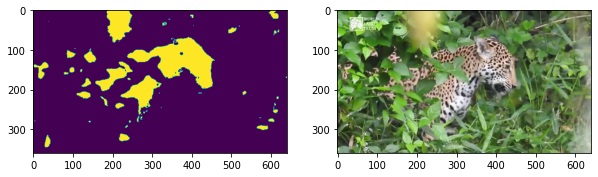

In [23]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow((bnorm_img[:,:,0] > 0.9999) & \
           (bnorm_img[:,:,1] < 0.9999) & \
           (bnorm_img[:,:,2] < 0.9999))
plt.subplot(122)
plt.imshow(image)
plt.show()

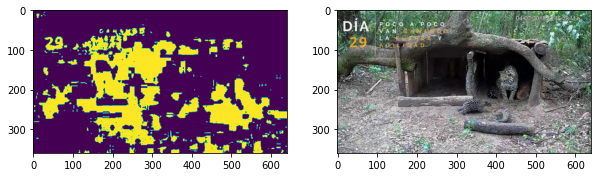

In [24]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow((bnorm_2_img[:,:,0] > 0.9999) & \
           (bnorm_2_img[:,:,1] < 0.9999) & \
           (bnorm_2_img[:,:,2] < 0.9999))
plt.subplot(122)
plt.imshow(image_2)
plt.show()